# Individual Exam CtH | Analysing "Brand Twitter"

### Author: *George*

Be sure to check the assignment description on Canvas once more.

Handing in the notebook should be done in a `zip` file, together with any files you create. We request you to name the exam submission as "exam_name_studentname.zip" with your corresponding name. The data is presented in the `data` folder. Also, include the files containing the data when handing in your exam, as this helps us to check your code when re-running it. To check if we can run your notebook from top to bottom without receiving errors, try to clear all the output of the cells and rerun everything. This can be done automatically by clicking on `Runtime --> Restart and run all`.

Good luck!

# Introduction

For this assignment we will investigate the phenomenon of "*Brand Twitter*". While corporate communication is traditionally rather bland, in recent years a trend has emerged of brands communicating on social media in a far less formal way. Social media teams of certain brands have started use memes, edgy humour and an informal and personal style of writing, sometimes also engaging with other brand accounts in a way that is similar to how many Twitter users tweet and interact with each other. This phenomenon of corporate personhood has been called *Brand Twitter*.

In 2019, Vulture published a history of the phenomenon, just in case you find it interesting: https://www.vulture.com/2019/06/brand-twitter-jokes-history.html

For this assignment we will consider a group of brand accounts that are often considered part of *Brand Twitter*:

    * @Wendys - Wendy's
    * @PrimeVideo - Amazon Prime Video
    * @MerriamWebster - Merriam Webster
    * @BurgerKing - Burger King
    * @Netflix - Netflix US
    * @McDonalds - McDonald's
    * @DennysDiner - Denny's Diner

We thought it would be interesting to analyse the tweets of these brand accounts to learn more about this novel style of corporate communication and the ways corporations might be perceived as relatable people on social media.

# Data

The data can be found within the file `brand_tweets.csv`. This file contains twitter data on tweets (every row is one tweet) by these brands.

FYI: This data was acquired from Twitter using their API if you're interested, following the method from the optional Notebook 7.

*Please note: this dataset might contain content which could be considered as offensive. It is real unfiltered data directly from Twitter.*

# Tasks

We would like to look through some recent tweets of *Brand Twitter*, and be able to understand certain characteristics of their tweets. As these Twitter accounts represent major brands, one particularly interesting aspect of this dataset is the difference between regular tweets and tweets that are replies to other tweets, which could be replies to customers or other brands.

Make your code and results as pretty as possible, and feel free to use tabs and enumeration when printing text and formatting for the visualisations. 

This assignment is about getting familiar with Pandas' methods — we suggest going through the lecture and seminar notebooks on Pandas again. You can of course use any course material in this assignment!

You are not limited to the structure of the cells below with ` # Your code here` only. Organise your code the way you think is most readible and appropriate.

If you do not fully manage to solve a question in the requested way, feel free to solve it in a different way to be able to proceed with later questions - you'll probably still get some points.

### Question 1: Pre-processing
* Add a column with a normalised version of the 'text' column. Use an appropriate tokenizer for this type of data in your normalization function. As the 'text' column contains strings, things will be easier if your normalized text column will also contain strings.

Continue to work with this normalized column in the next tasks. You're of course free to add more columns if you think you need them.

In [1]:
#Download the necessary packages and bypassing pycharm bug
# https://stackoverflow.com/questions/38916452/nltk-download-ssl-certificate-verify-failed
# import nltk
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
#Your code here
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
#Opening the csv and putting it into a data frame for later processing
df = pd.read_csv('data/brand_tweets.csv')
df.head()
#Creating a new column for the normalized text
df['normalized_text'] = df['text']
#Creating a function to normalize the text
def normalize_text(text):
    #Tokenizing the text
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    #Removing stopwords
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    #Lemmatizing the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    #Stemming the text
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(token) for token in tokens]
    #Joining the text
    text = ' '.join(tokens)
    return text
#Applying the function to the normalized text column
df['normalized_text'] = df['normalized_text'].apply(normalize_text)
df.head()
# #Printing the first 10 rows of the normalized text column for testing
# df['normalized_text'].head(10)



,username,user_id,tweet_id,created_at,text,in_reply_to_user,retweet_count,like_count,reply_count,quote_count,normalized_text
0,Wendys,59553554,1638267643135250440,2023-03-21 19:53:38+00:00,@pure_fox3 This isn’t the service we expect. P...,9.940359e+17,0,1,0,0,@pure_fox3 This ’ service expect . Please DM u...
1,Wendys,59553554,1638267205459619841,2023-03-21 19:51:53+00:00,@violetisaghost We're disappointed to hear thi...,1.593276e+18,0,0,0,0,@violetisaghost We're disappointed hear . Plea...
2,Wendys,59553554,1638188566864863233,2023-03-21 14:39:25+00:00,@Ciabatta_Boi https://t.co/XtTwZVeNcM,1.464782e+18,0,2,2,0,@Ciabatta_Boi https://t.co/XtTwZVeNcM
3,Wendys,59553554,1637955779432001538,2023-03-20 23:14:24+00:00,@Plentlyofcolin We're sorry to read this. Can ...,4.710757e+09,0,2,0,0,@Plentlyofcolin We're sorry read . Can DM u ad...
4,Wendys,59553554,1637929081814540289,2023-03-20 21:28:19+00:00,@Quasimfk We're disappointed to hear this. Ple...,1.518750e+18,0,1,0,0,@Quasimfk We're disappointed hear . Please sen...


### Question 2: Description / statistics

Provide information on: 

1. Number of tweets (per brand and in total)
2. How many of those tweets are replies (per brand and in total)
3. Most liked tweet (per brand and in total)
4. Most frequent hashtags (per brand and in total)

You can present the answers in this notebook. If you prefer, you may also write your results to a separate text file (optional).

#### Number of tweets (per brand and in total)

In [3]:
#Printing the number of tweets per brand
df['username'].value_counts()

BurgerKing        3248
McDonalds         3248
Wendys            3246
DennysDiner       3210
MerriamWebster    3169
PrimeVideo        1966
Netflix           1828
Name: username, dtype: int64

#### How many of those tweets are replies (per brand and in total)

In [4]:
#Separating the dataframes per username
df_wendys = df[df['username'] == 'Wendys']
df_primevideo = df[df['username'] == 'PrimeVideo']
df_merriamwebster = df[df['username'] == 'MerriamWebster']
df_burgerking = df[df['username'] == 'BurgerKing']
df_netflix = df[df['username'] == 'Netflix']
df_mcdonalds = df[df['username'] == 'McDonalds']
df_dennysdiner = df[df['username'] == 'DennysDiner']
#Counting the number of times in_reply_to_user is not null per username
wendysReply = df_wendys['in_reply_to_user'].notnull().sum()
primeReply = df_primevideo['in_reply_to_user'].notnull().sum()
merriamReply = df_merriamwebster['in_reply_to_user'].notnull().sum()
bkReply = df_burgerking['in_reply_to_user'].notnull().sum()
netflixReply = df_netflix['in_reply_to_user'].notnull().sum()
mecReply = df_mcdonalds['in_reply_to_user'].notnull().sum()
dennysReply = df_dennysdiner['in_reply_to_user'].notnull().sum()
#Printing the number of replies per brand
print("Per brand, the number of replies is the following:")
print("Wendys: ", wendysReply)
print("Prime Video: ", primeReply)
print("Merriam Webster: ", merriamReply)
print("Burger King: ", bkReply)
print("Netflix: ", netflixReply)
print("McDonalds: ", mecReply)
print("Dennys Diner: ", dennysReply)

#Totalling the number of replies
totalReplies = wendysReply + primeReply + merriamReply + bkReply + netflixReply + mecReply + dennysReply
print("The total number of replies is: ", totalReplies)


Per brand, the number of replies is the following:
Wendys:  3174
Prime Video:  543
Merriam Webster:  1244
Burger King:  3192
Netflix:  362
McDonalds:  3245
Dennys Diner:  2349
The total number of replies is:  14109


#### Most liked tweet (per brand and in total)

In [5]:
#Finding the most liked tweet per brand
mostLikedWendys = df_wendys['like_count'].max()
mostLikedPrime = df_primevideo['like_count'].max()
mostLikedMerriam = df_merriamwebster['like_count'].max()
mostLikedBK = df_burgerking['like_count'].max()
mostLikedNetflix = df_netflix['like_count'].max()
mostLikedMec = df_mcdonalds['like_count'].max()
mostLikedDennys = df_dennysdiner['like_count'].max()
#Associating the most liked tweet with the brand
mostLikedWendys = df_wendys[df_wendys['like_count'] == mostLikedWendys]['text'].values[0]
mostLikedPrime = df_primevideo[df_primevideo['like_count'] == mostLikedPrime]['text'].values[0]
mostLikedMerriam = df_merriamwebster[df_merriamwebster['like_count'] == mostLikedMerriam]['text'].values[0]
mostLikedBK = df_burgerking[df_burgerking['like_count'] == mostLikedBK]['text'].values[0]
mostLikedNetflix = df_netflix[df_netflix['like_count'] == mostLikedNetflix]['text'].values[0]
mostLikedMec = df_mcdonalds[df_mcdonalds['like_count'] == mostLikedMec]['text'].values[0]
mostLikedDennys = df_dennysdiner[df_dennysdiner['like_count'] == mostLikedDennys]['text'].values[0]
#Printing the most liked tweet per brand
print("The most liked tweet per brand is the following:")
print("Wendys: ", mostLikedWendys)
print("Prime Video: ", mostLikedPrime)
print("Merriam Webster: ", mostLikedMerriam)
print("Burger King: ", mostLikedBK)
print("Netflix: ", mostLikedNetflix)
print("McDonalds: ", mostLikedMec)
print("Dennys Diner: ", mostLikedDennys)
#Finding the most liked tweet in total
mostLikedTotal = df['like_count'].max()
#Associating the most liked tweet with the text
mostLikedTotal = df[df['like_count'] == mostLikedTotal]['text'].values[0]
#Printing the most liked tweet in total
print("The most liked tweet in total is: ", mostLikedTotal)

The most liked tweet per brand is the following:
Wendys:  .@elonmusk let me tweet from space pls
Prime Video:  Like if you can hear this image. https://t.co/gusrJ77Abr
Merriam Webster:  ONE OF THE DEFINITIONS OF 'LITERALLY' IS "IN EFFECT, VIRTUALLY—USED IN AN EXAGGERATED WAY TO EMPHASIZE A STATEMENT OR DESCRIPTION." SOME PEOPLE GET MAD IF YOU USE IT THIS WAY BECAUSE IT ISN'T THE WORD'S PRIMARY MEANING, BUT THIS SENSE OF 'LITERALLY' HAS BEEN USED FOR 250 YEARS SO https://t.co/teDuHmxtrk
Burger King:  bk boss: did you write those tweets i asked for?

my brain: whopper whopper whopper whopper
Netflix:  Wednesday has been officially renewed for Season 2! https://t.co/ekqlxP9ueW
McDonalds:  i read all the comments 🫶 https://t.co/6mLhl44v1L
Dennys Diner:  find cute baby from viral video and bring him to Denny’s … ✅ https://t.co/f6BvdfnzaB
The most liked tweet in total is:  Wednesday has been officially renewed for Season 2! https://t.co/ekqlxP9ueW


#### Most frequent hashtags (per brand and in total)

In [6]:
#Finding the most frequent hashtags per brand from the normalized text column
mostFreqWendys = df_wendys['normalized_text'].str.findall(r"#(\w+)").sum()
mostFreqPrime = df_primevideo['normalized_text'].str.findall(r"#(\w+)").sum()
mostFreqMerriam = df_merriamwebster['normalized_text'].str.findall(r"#(\w+)").sum()
mostFreqBK = df_burgerking['normalized_text'].str.findall(r"#(\w+)").sum()
mostFreqNetflix = df_netflix['normalized_text'].str.findall(r"#(\w+)").sum()
mostFreqMec = df_mcdonalds['normalized_text'].str.findall(r"#(\w+)").sum()
mostFreqDennys = df_dennysdiner['normalized_text'].str.findall(r"#(\w+)").sum()
#Normalizing the hashtags
mostFreqWendys = list(map(lambda x: x.lower(), mostFreqWendys))
mostFreqPrime = list(map(lambda x: x.lower(), mostFreqPrime))
mostFreqMerriam = list(map(lambda x: x.lower(), mostFreqMerriam))
mostFreqBK = list(map(lambda x: x.lower(), mostFreqBK))
mostFreqNetflix = list(map(lambda x: x.lower(), mostFreqNetflix))
mostFreqMec = list(map(lambda x: x.lower(), mostFreqMec))
mostFreqDennys = list(map(lambda x: x.lower(), mostFreqDennys))
#Finding the hashtags that are present more than once per brand
mostFreqWendys = [i for i in mostFreqWendys if mostFreqWendys.count(i) > 1]
mostFreqPrime = [i for i in mostFreqPrime if mostFreqPrime.count(i) > 1]
mostFreqMerriam = [i for i in mostFreqMerriam if mostFreqMerriam.count(i) > 1]
mostFreqBK = [i for i in mostFreqBK if mostFreqBK.count(i) > 1]
mostFreqNetflix = [i for i in mostFreqNetflix if mostFreqNetflix.count(i) > 1]
mostFreqMec = [i for i in mostFreqMec if mostFreqMec.count(i) > 1]
mostFreqDennys = [i for i in mostFreqDennys if mostFreqDennys.count(i) > 1]
#Putting the most frequent hashtags in a pandas dataframe and finding the top 5 most frequent hashtags per brand
mostFreqWendys = pd.DataFrame(mostFreqWendys, columns=['hashtags']).value_counts()[:5]
mostFreqPrime = pd.DataFrame(mostFreqPrime, columns=['hashtags']).value_counts()[:5]
mostFreqMerriam = pd.DataFrame(mostFreqMerriam, columns=['hashtags']).value_counts()[:5]
mostFreqBK = pd.DataFrame(mostFreqBK, columns=['hashtags']).value_counts()[:5]
mostFreqNetflix = pd.DataFrame(mostFreqNetflix, columns=['hashtags']).value_counts()[:5]
mostFreqMec = pd.DataFrame(mostFreqMec, columns=['hashtags']).value_counts()[:5]
mostFreqDennys = pd.DataFrame(mostFreqDennys, columns=['hashtags']).value_counts()[:5]
#Printing the most frequent hashtags per brand
print("The most frequent hashtags per brand are the following:")
print("Wendys: ", mostFreqWendys)
print("Prime Video: ", mostFreqPrime)
print("Merriam Webster: ", mostFreqMerriam)
print("Burger King: ", mostFreqBK)
print("Netflix: ", mostFreqNetflix)
print("McDonalds: ", mostFreqMec)
print("Dennys Diner: ", mostFreqDennys)
#Finding the most frequent hashtags in total from the normalized text column
mostFreqTotal = df['normalized_text'].str.findall(r"#(\w+)").sum()
#Putting the most frequent hashtags in a series and finding the top 5 most frequent hashtags
mostFreqTotal = pd.Series(mostFreqTotal).value_counts()[:5]
#Printing the dataframe with the top 5 hastags per brand
print("The most frequent hashtags in total are the following:")
print(mostFreqTotal)
#Printing the dataframe with the most frequent hashtags in total
print("The most frequent hashtags in total are the following:")
print(mostFreqTotal)


The most frequent hashtags per brand are the following:
Wendys:  hashtags          
wendyshotandcrispy    49
choosehotandcrispy    26
dtype: int64
Prime Video:  hashtags       
mypoliceman        68
theringsofpower    60
tnfonprime         57
theperipheral      40
harlemonprime      33
dtype: int64
Merriam Webster:  hashtags    
wordoftheday    714
spellingbee      30
etymology        10
poprhetoric       9
wordwellused      7
dtype: int64
Burger King:  hashtags       
burgerkingyes      19
yourule            13
bkcontest           6
bkwarmcore          3
homeoftheghosts     3
dtype: int64
Netflix:  hashtags           
tudum                  75
sagawards              37
netflixsavethedates    19
chrisrocklive           7
everybodyin             7
dtype: int64
McDonalds:  Series([], dtype: int64)
Dennys Diner:  hashtags       
dennysfc           21
dennysbreakfast    20
happydaddysday     17
nftfornkh           6
thematrix           6
dtype: int64
The most frequent hashtags in total are


### Question 3: Analysis - Corporate personhood

To observe to what extent the brands encourage corporate personhood, it would be interesting to see what pronouns the brands use to refer to themselves: "we" or "I". Let us define a "First Person Pronoun Ratio" - the total number of times that the word "I" is used by a brand / the total number of times the words "I" or "we" are used by a brand. This should give us a value between 0 and 1, and a higher value indicates that the brand used the word "I" relatively more often compared to the word "we". If we multiply this value by 100, it becomes a percentage.

1. For all of the 7 brands, compute their First Person Pronoun Ratio (or percentage) as defined here.
2. Choose the brand with the highest First Person Pronoun Ratio. For this brand, compute the First Person Pronoun Ratio separately for tweets that are replies and tweets that are not replies.

Briefly interpret the result (as a text block).

In [7]:
#Creating a function to compute the First Person Pronoun Ratio
def firstPersonPronounRatio(text):
    #Counting the number of times the word "I" is used
    iCount = text.count("I")
    #Counting the number of times the word "we" is used
    weCount = text.count("we")
    #Counting the number of times the word "I" or "we" is used
    iWeCount = iCount + weCount
    #Computing the First Person Pronoun Ratio
    firstPersonPronounRatio = iCount / iWeCount
    #Returning the First Person Pronoun Ratio
    return firstPersonPronounRatio
#Computing the First Person Pronoun Ratio for each brand
firstPersonPronounRatioWendys = firstPersonPronounRatio(df_wendys['normalized_text'].str.cat(sep=' '))
firstPersonPronounRatioPrime = firstPersonPronounRatio(df_primevideo['normalized_text'].str.cat(sep=' '))
firstPersonPronounRatioMerriam = firstPersonPronounRatio(df_merriamwebster['normalized_text'].str.cat(sep=' '))
firstPersonPronounRatioBK = firstPersonPronounRatio(df_burgerking['normalized_text'].str.cat(sep=' '))
firstPersonPronounRatioNetflix = firstPersonPronounRatio(df_netflix['normalized_text'].str.cat(sep=' '))
firstPersonPronounRatioMec = firstPersonPronounRatio(df_mcdonalds['normalized_text'].str.cat(sep=' '))
firstPersonPronounRatioDennys = firstPersonPronounRatio(df_dennysdiner['normalized_text'].str.cat(sep=' '))
#Printing the First Person Pronoun Ratio for each brand
print("The First Person Pronoun Ratio for each brand is the following:")
print("Wendys: ", firstPersonPronounRatioWendys)
print("Prime Video: ", firstPersonPronounRatioPrime)
print("Merriam Webster: ", firstPersonPronounRatioMerriam)
print("Burger King: ", firstPersonPronounRatioBK)
print("Netflix: ", firstPersonPronounRatioNetflix)
print("McDonalds: ", firstPersonPronounRatioMec)
print("Dennys Diner: ", firstPersonPronounRatioDennys)
#Creating a dataframe that has only the tweet text of the fields where in_reply_to_user is not null per brand (i.e. only the replies)
dfWendysReplytext = df_wendys[df_wendys['in_reply_to_user'].notnull()]['normalized_text']
dfPrimeReplytext = df_primevideo[df_primevideo['in_reply_to_user'].notnull()]['normalized_text']
dfMerriamReplytext = df_merriamwebster[df_merriamwebster['in_reply_to_user'].notnull()]['normalized_text']
dfBKReplytext = df_burgerking[df_burgerking['in_reply_to_user'].notnull()]['normalized_text']
dfNetflixReplytext = df_netflix[df_netflix['in_reply_to_user'].notnull()]['normalized_text']
dfMecReplytext = df_mcdonalds[df_mcdonalds['in_reply_to_user'].notnull()]['normalized_text']
dfDennysReplytext = df_dennysdiner[df_dennysdiner['in_reply_to_user'].notnull()]['normalized_text']
#Computing the First Person Pronoun Ratio for each brand for the tweets that are replies
firstPersonPronounRatioWendysReply = firstPersonPronounRatio(dfWendysReplytext.str.cat(sep=' '))
firstPersonPronounRatioPrimeReply = firstPersonPronounRatio(dfPrimeReplytext.str.cat(sep=' '))
firstPersonPronounRatioMerriamReply = firstPersonPronounRatio(dfMerriamReplytext.str.cat(sep=' '))
firstPersonPronounRatioBKReply = firstPersonPronounRatio(dfBKReplytext.str.cat(sep=' '))
firstPersonPronounRatioNetflixReply = firstPersonPronounRatio(dfNetflixReplytext.str.cat(sep=' '))
firstPersonPronounRatioMecReply = firstPersonPronounRatio(dfMecReplytext.str.cat(sep=' '))
firstPersonPronounRatioDennysReply = firstPersonPronounRatio(dfDennysReplytext.str.cat(sep=' '))
#Printing the First Person Pronoun Ratio for each brand for the tweets that are replies
print("The First Person Pronoun Ratio for each brand for the tweets that are replies is the following:")
print("Wendys: ", firstPersonPronounRatioWendysReply)
print("Prime Video: ", firstPersonPronounRatioPrimeReply)
print("Merriam Webster: ", firstPersonPronounRatioMerriamReply)
print("Burger King: ", firstPersonPronounRatioBKReply)
print("Netflix: ", firstPersonPronounRatioNetflixReply)
print("McDonalds: ", firstPersonPronounRatioMecReply)
print("Dennys Diner: ", firstPersonPronounRatioDennysReply)




The First Person Pronoun Ratio for each brand is the following:
Wendys:  0.7764598540145985
Prime Video:  0.7335722819593787
Merriam Webster:  0.6916208791208791
Burger King:  0.7868568958063121
Netflix:  0.7913938260056127
McDonalds:  0.30393996247654786
Dennys Diner:  0.6832174776564052
The First Person Pronoun Ratio for each brand for the tweets that are replies is the following:
Wendys:  0.774102079395085
Prime Video:  0.7131782945736435
Merriam Webster:  0.6730769230769231
Burger King:  0.787261698440208
Netflix:  0.7953216374269005
McDonalds:  0.30451127819548873
Dennys Diner:  0.6491499227202473


### Question 4: Analysis - Brand interaction

Among the tweets that are replies, do the *Brand Twitter* brands reply to each other? (in a tweet this is done by writing @username at the beginning of the tweet)

1. Print three tweets from the dataframe in which a brand mentions one of the other brands.
2. For all of the 7 brands, find out how often they mention each of the other brands in replies. Present the result as a DataFrame.
 
Briefly interpret the result (as a text block).

In [8]:
import time
#Creating a list of the brands' usernames
brandUsernames = ['@Wendys', '@PrimeVideo', '@MerriamWebster', '@BurgerKing', '@Netflix', '@McDonalds', '@DennysDiner']
#Creating a dataframe that has the the normalized tweet text and the username in fields where in_reply_to_user is not null per brand (i.e. only the replies)
dfWendysReplyInteractionText = df_wendys[df_wendys['in_reply_to_user'].notnull()][['normalized_text', 'username']]
dfPrimeReplyInteractionText = df_primevideo[df_primevideo['in_reply_to_user'].notnull()][['normalized_text', 'username']]
dfMerriamReplyInteractionText = df_merriamwebster[df_merriamwebster['in_reply_to_user'].notnull()][['normalized_text', 'username']]
dfBKReplyInteractionText = df_burgerking[df_burgerking['in_reply_to_user'].notnull()][['normalized_text', 'username']]
dfNetflixReplyInteractionText = df_netflix[df_netflix['in_reply_to_user'].notnull()][['normalized_text', 'username']]
dfMecReplyInteractionText = df_mcdonalds[df_mcdonalds['in_reply_to_user'].notnull()][['normalized_text', 'username']]
dfDennysReplyInteractionText = df_dennysdiner[df_dennysdiner['in_reply_to_user'].notnull()][['normalized_text', 'username']]
#Defining a function that stores the tweets that mention a brand in a list of names from a dataframe of text replies, excluding the tweets that are replies to the brand itself and outputs it as a dataframe of the username of the brand and the tweet
def replyChecker(usernames, dataframe):
    ''' This function takes a list of usernames and a dataframe as input and returns a list of tweets that mention a brand in a list of names from a dataframe
    Input: usernames: a list of usernames
           dataframe: a dataframe that contains the normalized text and the username of the tweets that are replies
   Output: A dataframe that contains the username of the poster and the text of the tweet that mentions a brand in a list of names from a dataframe'''
    #Creating an empty list to store the tweets that mention a brand in a list of names from a dataframe of text replies
    tweetList = []
    #Iterating over the usernames in the list of usernames
    for username in usernames:
        #Iterating over the rows in the dataframe
        for index, row in dataframe.iterrows():
            #Checking if the username is in the tweet and if the tweet is not a reply to the brand itself
            if username in row['normalized_text'] and username not in row['username']:
                #Appending the username and the tweet to the list
                tweetList.append([row['username'], row['normalized_text']])
    #Creating a dataframe from the list of tweets that mention a brand in a list of names from a dataframe of text replies
    df = pd.DataFrame(tweetList, columns = ['username', 'normalized_text'])
    #Returning the dataframe
    return df

#Applying the function to the dataframes of the replies
dfWendysAdminRizz = replyChecker(brandUsernames, dfWendysReplyInteractionText)
dfPrimeAdminRizz = replyChecker(brandUsernames, dfPrimeReplyInteractionText)
dfMerriamAdminRizz = replyChecker(brandUsernames, dfMerriamReplyInteractionText)
dfBKAdminRizz = replyChecker(brandUsernames, dfBKReplyInteractionText)
dfNetflixAdminRizz = replyChecker(brandUsernames, dfNetflixReplyInteractionText)
dfMecAdminRizz = replyChecker(brandUsernames, dfMecReplyInteractionText)
dfDennysAdminRizz = replyChecker(brandUsernames, dfDennysReplyInteractionText)
#Reducing the dataframes to the columns that are needed
#Printing the dataframes in a table
pd.set_option('display.max_colwidth', None)
print("The tweets that mention a brand in a list of names from a dataframe of text replies are the following:")
print("Wendys: ")
display(dfWendysAdminRizz[0:3])
print("Prime Video: ")
display(dfPrimeAdminRizz[0:3])
print("Merriam Webster: ")
display(dfMerriamAdminRizz[0:3])
print("Burger King: ")
display(dfBKAdminRizz[0:3])
print("Netflix: ")
display(dfNetflixAdminRizz[0:3])
print("McDonalds: ")
display(dfMecAdminRizz[0:3])
print("Dennys Diner: ")
display(dfDennysAdminRizz[0:3])


The tweets that mention a brand in a list of names from a dataframe of text replies are the following:
Wendys: 


,username,normalized_text
0,Wendys,"@1177_potato @WendysCanada We certainly ’ like hear . Please DM u full address location visited , along first last name , phone number email address someone follow ."
1,Wendys,@Visible @Wendys
2,Wendys,"@WendysLeaks Be careful wish , bestie ."


Prime Video: 


,username,normalized_text
0,PrimeVideo,@AmazonStudios @goldenglobes LET ’ S GOOOOOO ! ! ! @PrimeVideoLat
1,PrimeVideo,@PrimeVideoCA @TheBoysTV @KarenFukuhara club bed 😭 😂 😭 💀


Merriam Webster: 


,username,normalized_text
0,MerriamWebster,@PrimeVideo 👀


Burger King: 


,username,normalized_text
0,BurgerKing,@ZarZanganeh @Wendys Hi Zar ! 👋 Thank letting u know . Can send u DM assist ? 👑
1,BurgerKing,@LorenBrooksLAB @McDonalds @Chilis 🫡


Netflix: 


,username,normalized_text
0,Netflix,@NetflixIsAJoke think might something ...
1,Netflix,"@lalioficial @NetflixES @skyrojo YOU everything , Lali 👑"
2,Netflix,@NetflixGeeked @benbarnes -


McDonalds: 


,username,normalized_text
0,McDonalds,@McDonaldsCanada sometimes tweet
1,McDonalds,"@alexxxsayshii @McDonaldsUK always intend make order perfect , Alex . talk u : https://t.co/MOjDkbErPp"


Dennys Diner: 


,username,normalized_text
0,DennysDiner,"@MerriamWebster For anyone struggling daylight saving time / daylight saving / daylight saving / daylight saving time / daylight time , we've got free coffee name , redeemable Monday , March 13th 6am - 2pm local time 😉 https://t.co/lGatYDQ5xA"
1,DennysDiner,@BurgerKing https://t.co/WeTvygRCdD
2,DennysDiner,@missmontserrat_ We @DennysDiner .


### Question 5: Visualization

1. Plot the number of tweets in the whole dataset per week. 
    * Interpret the graph. Can you explain the overall pattern and/or some of the fluctuations that are visible? Feel free to also make reference to the numbers you computed for Question 2 in your explanation.
    * (If needed, restrict the dataframe to an active twitter timeframe)

2. Choose one of the seven brands and plot its (Twitter) popularity over time (choose the time unit and range of your choice) by:
    * Number of retweets
    * Number of likes
  
  You can either try to plot these two metrics (retweets/likes) in the same figure, or create multiple figures.
  


<Axes: title={'center': 'Number of tweets per week'}, xlabel='dateweek'>

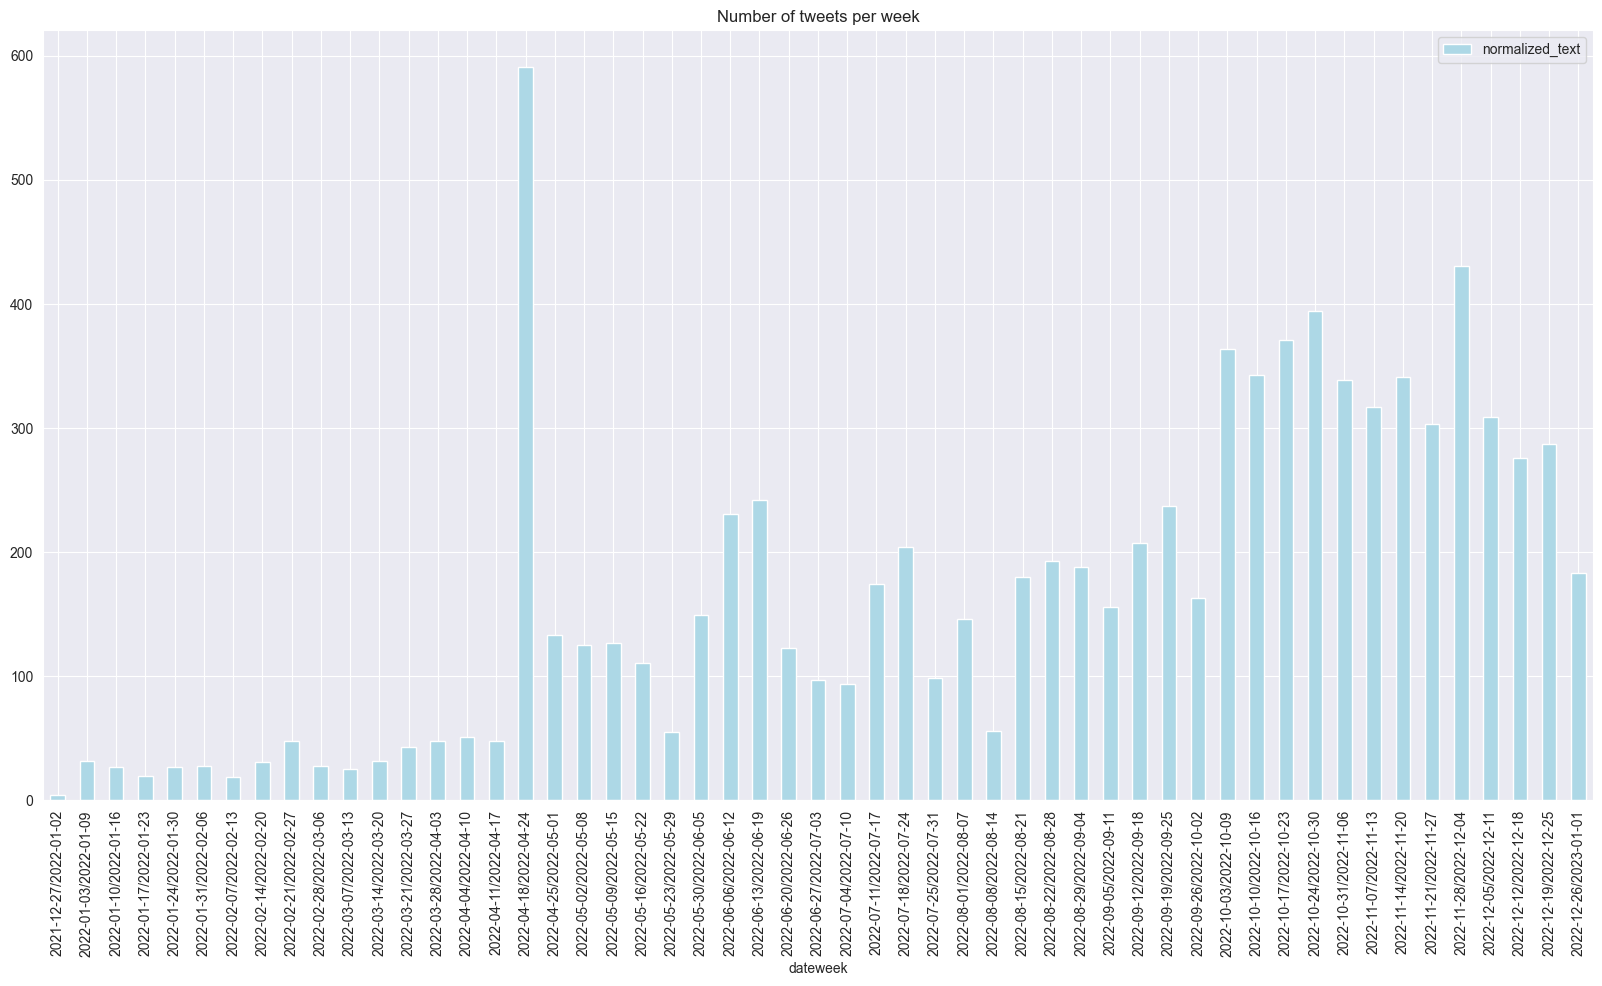

In [11]:
import pandas as pd
#Restricting the dataframe to the year 2022
df = df[(df['created_at'] > '2022-01-01') & (df['created_at'] < '2022-12-31')]
# Creating a dataframe that contains the normalized text, username, and a dateweek index based on the created_at field of the csv
dfWeek = df[['normalized_text', 'username', 'created_at']].copy()
dfWeek['created_at'] = pd.to_datetime(dfWeek['created_at']).dt.tz_localize(None)
dfWeek['dateweek'] = dfWeek['created_at'].dt.to_period('W')

# Counting the number of tweets per week
dfWeekCount = dfWeek.groupby('dateweek').count()

# Plotting the number of tweets per week
dfWeekCount.plot(kind='bar', y='normalized_text', figsize= (20,10), title='Number of tweets per week', color='lightblue')



<Axes: title={'center': 'Number of likes and retweets per week for @Wendys'}, xlabel='dateweek'>

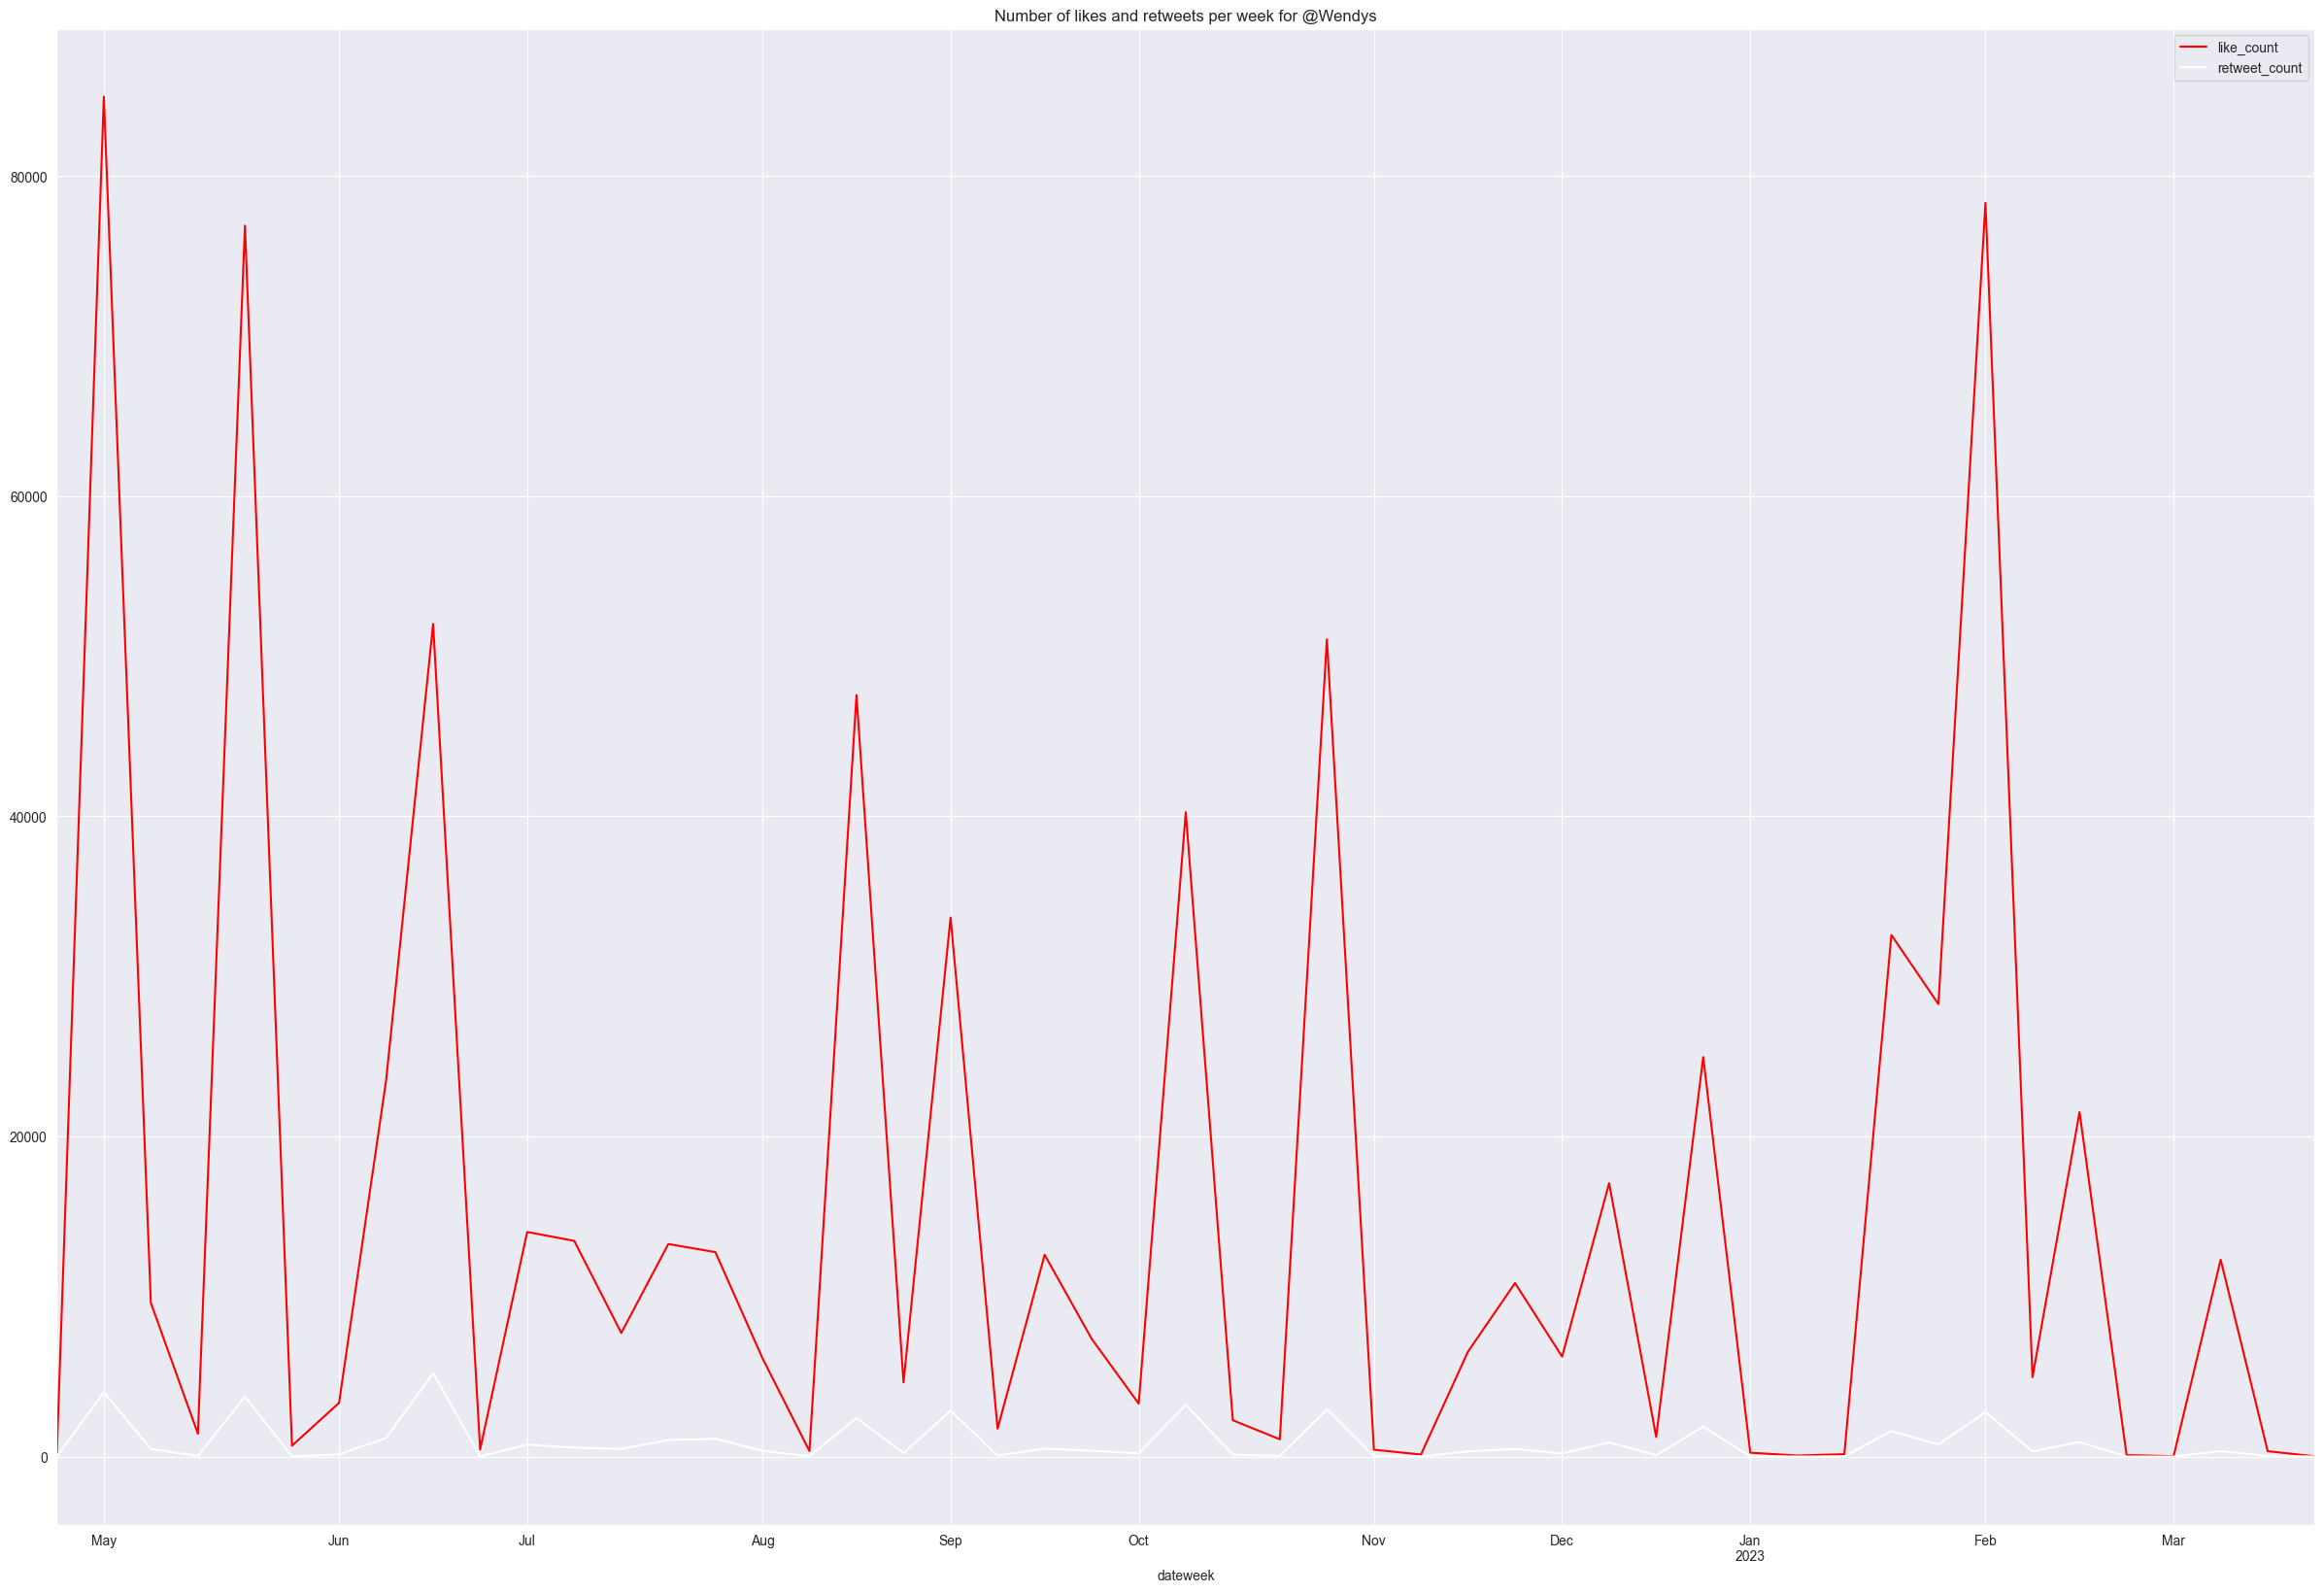

In [29]:
import pandas as pd

dfWeekWendys = df_wendys[['normalized_text', 'like_count', 'retweet_count', 'created_at']].copy()
dfWeekWendys['created_at'] = pd.to_datetime(dfWeekWendys['created_at']).dt.tz_localize(None)
dfWeekWendys['dateweek'] = dfWeekWendys['created_at'].dt.to_period('W')

dfWeekWendys = dfWeekWendys[(dfWeekWendys['created_at'] > '2022-01-01') & (dfWeekWendys['created_at'] < '2023-12-31')]

dfWeekWendysCount = dfWeekWendys.groupby('dateweek').sum(numeric_only=True)

dfWeekWendysCount.plot(kind='line', y=['like_count', 'retweet_count'], figsize=(30, 20), title='Number of likes and retweets per week for @Wendys', color=['red', 'white'])
